# INSTALACIÓN E IMPORTS NECESARIOS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Instralación
# %pip install tensorflow numpy scikit-learn seaborn matplotlib folium requests pandas geopandas rasterio mapclassify imblearn python-aqi --quiet
%pip install tensorflow==2.15 keras==2.15 scikeras scikit-learn==1.2.2 numpy seaborn matplotlib folium requests pandas geopandas rasterio mapclassify imblearn python-aqi openpyxl --quiet
# Librerías básicas
import os
import json
from io import StringIO
from itertools import combinations
import requests

# Librerías de manejo de datos
import pandas as pd
###############################################################################
###################   GP: added packages            ###########################
###############################################################################
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
###############################################################################
import numpy as np

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de aprendizaje automático
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import *
from sklearn.preprocessing import *
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix
from scipy.stats import pearsonr
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Librerías de balanceo de datos
from imblearn.over_sampling import SMOTE

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GroupKFold, GridSearchCV
from scipy import stats
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GroupKFold, GridSearchCV
from xgboost import XGBClassifier
import numpy as np
import openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
dataframe_completo_original = pd.read_excel('/content/drive/MyDrive/df_completo.xlsx')
dataframe_completo_original

,Fecha,id_estacion,Estación,mediciones,type,geometry.type,coordenadas,dir_estacion,municipio,comunidad,id_municipio,id_comunidad,properties._links.self.href,Zona_geografica
0,2023-01-01,83,ELCIEGO,"{'NO': 1.0, 'NO2': 2.0, 'NOX': 4.0, 'O3': 58.0...",Feature,Point,"[-2.61947521199466, 42.51824807424149]","C/ Gabriel Celaya, 8",Elciego,Araba/Álava,22,1,https://api.euskadi.eus/air-quality/stations/83,Industrial
1,2023-01-02,83,ELCIEGO,"{'NO': 1.0, 'NO2': 5.0, 'NOX': 7.0, 'O3': 51.0...",Feature,Point,"[-2.61947521199466, 42.51824807424149]","C/ Gabriel Celaya, 8",Elciego,Araba/Álava,22,1,https://api.euskadi.eus/air-quality/stations/83,Industrial
2,2023-01-03,83,ELCIEGO,"{'NO': 1.0, 'NO2': 6.0, 'NOX': 8.0, 'O3': 49.0...",Feature,Point,"[-2.61947521199466, 42.51824807424149]","C/ Gabriel Celaya, 8",Elciego,Araba/Álava,22,1,https://api.euskadi.eus/air-quality/stations/83,Industrial
3,2023-01-04,83,ELCIEGO,"{'NO': 1.0, 'NO2': 8.0, 'NOX': 9.0, 'O3': 41.0...",Feature,Point,"[-2.61947521199466, 42.51824807424149]","C/ Gabriel Celaya, 8",Elciego,Araba/Álava,22,1,https://api.euskadi.eus/air-quality/stations/83,Industrial
4,2023-01-05,83,ELCIEGO,"{'NO': 1.0, 'NO2': 9.0, 'NOX': 10.0, 'O3': 35....",Feature,Point,"[-2.61947521199466, 42.51824807424149]","C/ Gabriel Celaya, 8",Elciego,Araba/Álava,22,1,https://api.euskadi.eus/air-quality/stations/83,Industrial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19851,2023-12-27,91,ZIERBENA (Puerto),"{'CO': 0.15, 'CO 8h': 0.18, 'NO': 1.0, 'NO2': ...",Feature,Point,"[-3.080988277376953, 43.35305543364201]","Puerto de Zierbena, s/n. Bº El Puerto",Zierbena,Bizkaia,913,48,https://api.euskadi.eus/air-quality/stations/91,Industrial
19852,2023-12-28,91,ZIERBENA (Puerto),"{'CO': 0.2, 'CO 8h': 0.2, 'NO': 1.0, 'NO2': 2....",Feature,Point,"[-3.080988277376953, 43.35305543364201]","Puerto de Zierbena, s/n. Bº El Puerto",Zierbena,Bizkaia,913,48,https://api.euskadi.eus/air-quality/stations/91,Industrial
19853,2023-12-29,91,ZIERBENA (Puerto),"{'CO': 0.0, 'CO 8h': 0.0, 'NO': 1.0, 'NO2': 3....",Feature,Point,"[-3.080988277376953, 43.35305543364201]","Puerto de Zierbena, s/n. Bº El Puerto",Zierbena,Bizkaia,913,48,https://api.euskadi.eus/air-quality/stations/91,Industrial
19854,2023-12-30,91,ZIERBENA (Puerto),"{'CO': 0.18, 'CO 8h': 0.19, 'NO': 1.0, 'NO2': ...",Feature,Point,"[-3.080988277376953, 43.35305543364201]","Puerto de Zierbena, s/n. Bº El Puerto",Zierbena,Bizkaia,913,48,https://api.euskadi.eus/air-quality/stations/91,Industrial


In [ ]:
df_analisis = pd.read_excel("/content/drive/MyDrive/df_sinNaN.xlsx")

In [ ]:
df_analisis['Zona_geografica'] = dataframe_completo_original['Zona_geografica']
df_analisis

,Estacion,NO,NO2,NOX,O3,O3 8h,PM10,"PM2,5",SO2,Zona_geografica
0,ELCIEGO,1,2,4,58,56,13,0,0,Industrial
1,ELCIEGO,1,5,7,51,52,10,0,0,Industrial
2,ELCIEGO,1,6,8,49,49,5,0,0,Industrial
3,ELCIEGO,1,8,9,41,44,6,0,0,Industrial
4,ELCIEGO,1,9,10,35,34,6,0,0,Industrial
...,...,...,...,...,...,...,...,...,...,...
19851,ZIERBENA (Puerto),1,2,3,0,0,5,0,0,Industrial
19852,ZIERBENA (Puerto),1,2,3,0,0,4,0,0,Industrial
19853,ZIERBENA (Puerto),1,3,5,0,0,10,0,0,Industrial
19854,ZIERBENA (Puerto),1,4,6,0,0,5,0,0,Industrial


In [ ]:
print(f"Distribución de las zonas antes de balancear los datos: {df_analisis.Zona_geografica.value_counts()}")

# Seleccionamos 3000 filas aleatorias de la clase Urbana (2)
urbano_sample = df_analisis[df_analisis["Zona_geografica"] == 'Urbano'].sample(n=3000, random_state=1)

# Combinamos las filas de las tres clases para el nuevo dataframe balanceado
df_analisis_balanced = pd.concat([
    df_analisis[df_analisis["Zona_geografica"] == 'Rural'],
    df_analisis[df_analisis["Zona_geografica"] == 'Industrial'],
    urbano_sample
])

# Mezclamos el dataframe para mayor aleatoriedad
df_analisis_balanced = df_analisis_balanced.sample(frac=1, random_state=1).reset_index(drop=True)

df_analisis_balanced
print(f"Distribución después de las zonas despues de balancear los datos: {df_analisis_balanced.Zona_geografica.value_counts()}")

Distribución de las zonas antes de balancear los datos: Zona_geografica
Urbano        13015
Rural          3960
Industrial     2881
Name: count, dtype: int64
Distribución después de las zonas despues de balancear los datos: Zona_geografica
Rural         3960
Urbano        3000
Industrial    2881
Name: count, dtype: int64


# Preparación de los datos dirigido a los algorírmos:

* NORMALIZO LOS DATOS ANTES DE SEPARARLOS EN CONJUNTOS DE PRUEBA Y ENTRENAMIENTO.




In [ ]:
# Mapear las etiquetas de Zona_geografica a valores numéricos
mappings = {'Rural': 0, 'Industrial': 1, 'Urbano': 2}
df_analisis_balanced['Zona_geografica'] = df_analisis_balanced['Zona_geografica'].map(mappings)

# Inicializar el escalador
# scaler = StandardScaler (YA LO HE PROBADO Y ME DA PROBLEMILLAS)
scaler = MinMaxScaler()

# Seleccionar las columnas de contaminantes
columnas_contaminantes = ['NO', 'NO2', 'NOX', 'O3', 'O3 8h', 'PM10', 'PM2,5', 'SO2']

# Ajustar y transformar solo las columnas de contaminantes
df_analisis_balanced[columnas_contaminantes] = scaler.fit_transform(df_analisis_balanced[columnas_contaminantes])

# Dividir las estaciones en dos grupos (entrenamiento y prueba)
estaciones_entrenamiento, estaciones_prueba = train_test_split(df_analisis_balanced['Estacion'].unique(), test_size=0.2, random_state=42)

# Filtrar los datos de entrenamiento y prueba según las estaciones
df_entrenamiento = df_analisis_balanced[df_analisis_balanced['Estacion'].isin(estaciones_entrenamiento)]
df_prueba = df_analisis_balanced[df_analisis_balanced['Estacion'].isin(estaciones_prueba)]

# Dividir los datos en características (X) y etiquetas (y)
X_train_v2 = df_entrenamiento.drop(columns=['Estacion', 'Zona_geografica'])
y_train_v2 = df_entrenamiento['Zona_geografica']
X_test_v2 = df_prueba.drop(columns=['Estacion', 'Zona_geografica'])
y_test_v2 = df_prueba['Zona_geografica']

In [ ]:
y_test_v2

5       1
8       1
13      0
16      1
20      0
       ..
9812    1
9814    0
9833    1
9834    0
9840    0
Name: Zona_geografica, Length: 2318, dtype: int64

In [ ]:
df_prueba

,Estacion,NO,NO2,NOX,O3,O3 8h,PM10,"PM2,5",SO2,Zona_geografica
5,ELCIEGO,0.000000,0.130435,0.041237,0.516393,0.487395,0.088889,0.00,0.000000,1
8,ELCIEGO,0.000000,0.057971,0.010309,0.475410,0.495798,0.088889,0.00,0.000000,1
13,ALONSOTEGI,0.020833,0.231884,0.087629,0.000000,0.000000,0.103704,0.25,0.000000,0
16,MUSKIZ,0.000000,0.072464,0.020619,0.532787,0.563025,0.081481,0.15,0.043478,1
20,ALONSOTEGI,0.010417,0.188406,0.067010,0.000000,0.000000,0.207407,0.40,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
9812,MUSKIZ,0.000000,0.057971,0.010309,0.549180,0.579832,0.022222,0.05,0.086957,1
9814,URKIOLA,0.000000,0.028986,0.000000,0.450820,0.445378,0.000000,0.00,0.000000,0
9833,ELCIEGO,0.000000,0.028986,0.000000,0.532787,0.546218,0.051852,0.00,0.000000,1
9834,VALDEREJO,0.010417,0.057971,0.020619,0.836066,0.831933,0.096296,0.20,0.043478,0


# Algorítmos sin mejora

## KNN

In [ ]:
knn_model_sin_Mejora = KNeighborsClassifier()
knn_model_sin_Mejora.fit(X_train_v2, y_train_v2)
y_pred = knn_model_sin_Mejora.predict(X_test_v2)
knn_score_sinMejora = accuracy_score(y_test_v2, y_pred)
print("Precisión del KNN sin mejora: ", knn_score_sinMejora)

Precisión del KNN sin mejora:  0.33908541846419327


### Intento de predicción

In [ ]:
X_test_v2.head(1)

,NO,NO2,NOX,O3,O3 8h,PM10,"PM2,5",SO2
5,0.0,0.130435,0.041237,0.516393,0.487395,0.088889,0.0,0.0


In [ ]:
# Defino los datos de entrada
datos_entrada = X_test_v2.head(1)
# Predicción
knn_zona_predicha = knn_model_sin_Mejora.predict(datos_entrada)
print(f"Zona geográfica predicha: {knn_zona_predicha}")
# Zona verdadera:
knn_zona_verdadera = y_test_v2.head(1).iloc[0]
print(f"Zona geográfica verdadera: [{knn_zona_verdadera}]")

Zona geográfica predicha: [0]
Zona geográfica verdadera: [1]


## XGBoost

In [ ]:
xgb_sin_mejora = XGBClassifier()
xgb_sin_mejora.fit(X_train_v2, y_train_v2)
y_pred = xgb_sin_mejora.predict(X_test_v2)
xgb_score_sinMejora = accuracy_score(y_test_v2, y_pred)
print("Precisión del XGB sin mejora: ", xgb_score_sinMejora)

Precisión del XGB sin mejora:  0.28817946505608283


### Intento de predicción

In [ ]:
# Defino los datos de entrada
datos_entrada = X_test_v2.head(1)

# Predicción
xgb_zona_predicha = xgb_sin_mejora.predict(datos_entrada)
print(f"Zona geográfica predicha: {xgb_zona_predicha}")
# Zona verdadera:
xgb_zona_verdadera = y_test_v2.head(1).iloc[0]
print(f"Zona geográfica verdadera: [{xgb_zona_verdadera}]")

Zona geográfica predicha: [0]
Zona geográfica verdadera: [1]


## ADABoost

In [ ]:
ada_sin_mejora = AdaBoostClassifier()
ada_sin_mejora.fit(X_train_v2, y_train_v2)
y_pred = ada_sin_mejora.predict(X_test_v2)
adab_score_sinMejora = accuracy_score(y_test_v2, y_pred)
print("Precisión del ADA sin mejora: ", adab_score_sinMejora)

Precisión del ADA sin mejora:  0.31492666091458155


### Intento de predicción

In [ ]:
# Defino los datos de entrada
datos_entrada = X_test_v2.head(1)

# Predicción
ada_zona_predicha = ada_sin_mejora.predict(datos_entrada)
print(f"Zona geográfica predicha: {ada_zona_predicha}")
# Zona verdadera:
adab_zona_verdadera = y_test_v2.head(1).iloc[0]
print(f"Zona geográfica verdadera: [{adab_zona_verdadera}]")

Zona geográfica predicha: [0]
Zona geográfica verdadera: [1]


## SVM

In [ ]:
svc_sin_mejora = SVC()
svc_sin_mejora.fit(X_train_v2, y_train_v2)
y_pred = svc_sin_mejora.predict(X_test_v2)
svc_score_sinMejora = accuracy_score(y_test_v2, y_pred)
print("Precisión del SVM sin mejora: ", svc_score_sinMejora)

Precisión del SVM sin mejora:  0.36626402070750647


### Intento de predicción

In [ ]:
# Defino los datos de entrada
datos_entrada = X_test_v2.head(1)

# Predicción
svc_zona_predicha = svc_sin_mejora.predict(datos_entrada)
print(f"Zona geográfica predicha: {svc_zona_predicha}")
# Zona verdadera:
svc_zona_verdadera = y_test_v2.head(1).iloc[0]
print(f"Zona geográfica verdadera: [{svc_zona_verdadera}]")

Zona geográfica predicha: [0]
Zona geográfica verdadera: [1]


## LSTM

In [ ]:
# Dividir los datos en características (X) y etiquetas (y)
X_lstm = df_analisis_balanced.drop(columns=['Estacion', 'Zona_geografica'])
y_lstm = df_analisis_balanced['Zona_geografica']
groups = df_analisis_balanced['Estacion']

# Convertir X y y a formato adecuado para LSTM (secuencias)
def create_sequences(X, y, groups, time_steps=1):
    Xs, ys, gs = [], [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y[i + time_steps])
        gs.append(groups.iloc[i + time_steps])
    return np.array(Xs), np.array(ys), np.array(gs)

time_steps = 55
X_seq, y_seq, groups_seq = create_sequences(X_lstm, y_lstm, groups, time_steps)

# Asegurarse de que las dimensiones son adecuadas para LSTM
print(X_seq.shape, y_seq.shape, groups_seq.shape)

(9786, 55, 8) (9786,) (9786,)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical

X_train_LSTM = X_train_v2.values.reshape((X_train_v2.shape[0], 1, X_train_v2.shape[1]))
X_test_LSTM = X_test_v2.values.reshape((X_test_v2.shape[0], 1, X_test_v2.shape[1]))

# Codificar las etiquetas de salida de manera one-hot
y_train_one_hot = to_categorical(y_train_v2)
y_test_one_hot = to_categorical(y_test_v2)

lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='relu', input_shape=(1, X_train_v2.shape[1])))
lstm_model.add(Dense(3, activation='softmax')) # capa de salida con activación softmax para la clasificación.
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy')

lstm_model.fit(X_train_LSTM, y_train_one_hot, epochs = 10, batch_size=32)

# Obtener las probabilidades de cada clase para los datos de prueba
y_pred_prob = lstm_model.predict(X_test_LSTM)
# Seleccionar la clase con la probabilidad más alta para cada ejemplo
y_pred_lstm = np.argmax(y_pred_prob, axis=1)
# Calcular la precisión comparando las clases predichas con las etiquetas verdaderas
lstm_accuracy_sinMejora = (y_pred_lstm == np.argmax(y_test_one_hot, axis=1)).mean()
# Imprimir la precisión del modelo LSTM
print("Precisión del modelo LSTM:", lstm_accuracy_sinMejora)

Epoch 1/10
236/236 [==============================] - 3s 3ms/step - loss: 1.0081
Epoch 2/10
236/236 [==============================] - 1s 3ms/step - loss: 0.8326
Epoch 3/10
236/236 [==============================] - 1s 2ms/step - loss: 0.7339
Epoch 4/10
236/236 [==============================] - 1s 3ms/step - loss: 0.6877
Epoch 5/10
236/236 [==============================] - 1s 2ms/step - loss: 0.6574
Epoch 6/10
236/236 [==============================] - 1s 3ms/step - loss: 0.6292
Epoch 7/10
236/236 [==============================] - 1s 3ms/step - loss: 0.6022
Epoch 8/10
236/236 [==============================] - 1s 2ms/step - loss: 0.5759
Epoch 9/10
236/236 [==============================] - 1s 2ms/step - loss: 0.5534
Epoch 10/10
73/73 [==============================] - 1s 4ms/step
Precisión del modelo LSTM: 0.3515962036238136


### Intento de predicción

In [ ]:
# Defino los datos de entrada
datos_entrada = X_test_v2.head(1)
datos_entrada = datos_entrada.values.reshape((1, 1, X_test_v2.shape[1]))


# Predicción
lstm_zona_predicha = np.argmax(lstm_model.predict(datos_entrada), axis=1)
print(f"Zona geográfica predicha: {lstm_zona_predicha}")
# Zona verdadera:
lstm_zona_verdadera = y_test_v2.head(1).iloc[0]
print(f"Zona geográfica verdadera: {lstm_zona_verdadera}")

1/1 [==============================] - 0s 15ms/step
Zona geográfica predicha: [0]
Zona geográfica verdadera: 1


# TABLA DE LOS RESULTADOS OBTENIDOS

In [ ]:
import pandas as pd

# Crear un diccionario con los nombres de las columnas y los datos correspondientes
data = {
    'Algoritmo': ['KNN', 'XGBoost', 'ADABoost', 'SVM', 'LSTM'],
    'Score': [knn_score_sinMejora, xgb_score_sinMejora, adab_score_sinMejora, svc_score_sinMejora, lstm_accuracy_sinMejora],
    'Zona Predicción': [knn_zona_predicha, xgb_zona_predicha, ada_zona_predicha, svc_zona_predicha, lstm_zona_predicha],
    'Zona verdadera': [knn_zona_verdadera, xgb_zona_verdadera, adab_zona_verdadera, svc_zona_verdadera, lstm_zona_verdadera]
}

# Crear un DataFrame a partir del diccionario
df_comparacion = pd.DataFrame(data)

# Mostrar el DataFrame
df_comparacion

,Algoritmo,Score,Zona Predicción,Zona verdadera
0,KNN,0.339085,[0],1
1,XGBoost,0.288179,[0],1
2,ADABoost,0.314927,[0],1
3,SVM,0.366264,[0],1
4,LSTM,0.353753,[0],1


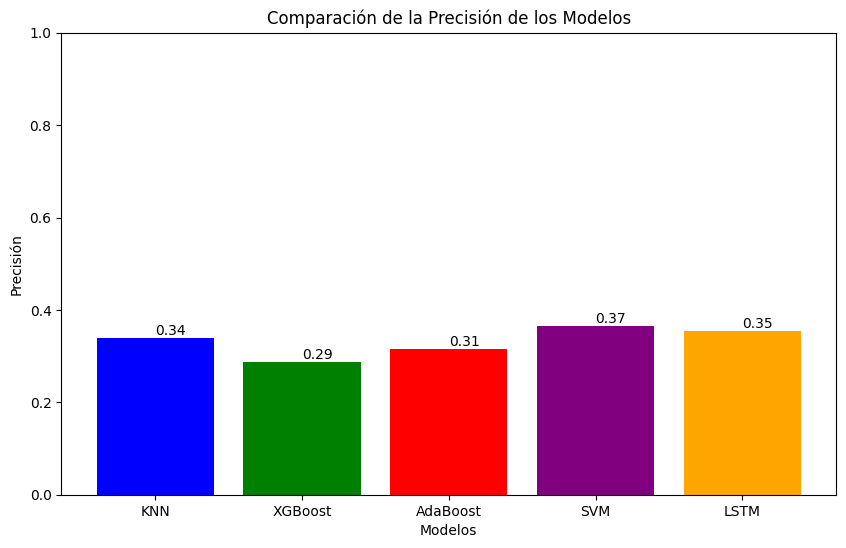

In [ ]:
import matplotlib.pyplot as plt

# Lista de nombres de los modelos
model_names = ['KNN', 'XGBoost', 'AdaBoost', 'SVM', 'LSTM']
# Lista de precisiones de los modelos
scores = [knn_score_sinMejora, xgb_score_sinMejora, adab_score_sinMejora, svc_score_sinMejora, lstm_accuracy_sinMejora]

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, scores, color=['blue', 'green', 'red', 'purple', 'orange'])

# Añadir las etiquetas de precisión encima de cada barra
for bar, score in zip(bars, scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(score, 2), va='bottom')  # va: vertical alignment

# Añadir títulos y etiquetas
plt.title('Comparación de la Precisión de los Modelos')
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.ylim(0, 1)
# Mostrar la gráfica
plt.show()


# Algoritmos con mejora

In [ ]:
# Combinar datos de entrenamiento y prueba
df_combined = pd.concat([df_entrenamiento, df_prueba])
# Definir las características (X) y etiquetas (y) para validación cruzada
X = df_combined.drop(columns=['Estacion', 'Zona_geografica'])
y = df_combined['Zona_geografica']
groups = df_combined['Estacion']

## KNN
Tarda alrededor de 10 minutos.

In [ ]:
# Definir el modelo base
knn_mejorado = KNeighborsClassifier()
groups = df_analisis_balanced['Estacion']
# Definir los parámetros que quieres ajustar
param_grid = {
    'n_neighbors': list(range(1, 52)),  # Probar valores de n_neighbors entre 1 y 51
    'weights': ['uniform', 'distance'],  # Probar diferentes pesos
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Probar diferentes métricas de distancia
}

# Configurar GroupKFold
group_kfold = GroupKFold(n_splits=55)

# Configurar GridSearchCV
grid_search = GridSearchCV(knn_mejorado, param_grid, cv=group_kfold, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo a los datos
grid_search.fit(X, y, groups=groups)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejores parámetros: {best_params}')

# Obtener el mejor modelo
best_knn = grid_search.best_estimator_

# Evaluar el mejor modelo en todo el conjunto de datos (opcional)
best_score_knn = grid_search.best_score_
print(f'Mejor puntuación de validación cruzada: {best_score_knn}')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mejores parámetros: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Mejor puntuación de validación cruzada: 0.8463681638515559


### Intento de predicción

In [ ]:
# Defino los datos de entrada
datos_entrada = X_test_v2.head(1)

# Predicción
knn_M_zona_predicha = best_knn.predict(datos_entrada)
print(f"Zona geográfica predicha: {knn_M_zona_predicha}")
# Zona verdadera:
knn_M_zona_verdadera = y_test_v2.head(1).iloc[0]
print(f"Zona geográfica verdadera: {knn_M_zona_verdadera}")

Zona geográfica predicha: [1]
Zona geográfica verdadera: 1


## SVM

In [ ]:
# Definir el modelo base
svm = SVC()

# Definir los parámetros que quieres ajustar
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'coef0': [0.5, 1]
}

# Configurar GroupKFold
group_kfold = GroupKFold(n_splits=10)

# Configurar GridSearchCV sin el argumento 'groups'
grid_search = GridSearchCV(svm, param_grid, cv=group_kfold, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo a los datos pasando 'groups' al método fit
grid_search.fit(X, y, groups=groups)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejores parámetros: {best_params}')

# Obtener el mejor modelo
best_svm = grid_search.best_estimator_

# Evaluar el mejor modelo en todo el conjunto de datos (opcional)
best_score_svm = grid_search.best_score_
print(f'Mejor puntuación de validación cruzada: {best_score_svm}')

Mejores parámetros: {'C': 10, 'coef0': 1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Mejor puntuación de validación cruzada: 0.8359811105931355


### Intento de predicción

In [ ]:
# Defino los datos de entrada
datos_entrada = X_test_v2.head(1)

# Predicción
svc_M_zona_predicha = best_svm.predict(datos_entrada)
print(f"Zona geográfica predicha: {svc_M_zona_predicha}")
# Zona verdadera:
svc_M_zona_verdadera = y_test_v2.head(1).iloc[0]
print(f"Zona geográfica verdadera: {svc_M_zona_verdadera}")

Zona geográfica predicha: [1]
Zona geográfica verdadera: 1


## XGBoost

In [ ]:
# Definir el modelo base
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Definir los parámetros que quieres ajustar
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Configurar GroupKFold
group_kfold = GroupKFold(n_splits=10)

# Configurar GridSearchCV sin el argumento 'groups'
grid_search = GridSearchCV(xgb, param_grid, cv=group_kfold, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo a los datos pasando 'groups' al método fit
grid_search.fit(X, y, groups=groups)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejores parámetros: {best_params}')

# Obtener el mejor modelo
best_xgb = grid_search.best_estimator_

# Evaluar el mejor modelo en todo el conjunto de datos (opcional)
best_score_xgb = grid_search.best_score_
print(f'Mejor puntuación de validación cruzada: {best_score_xgb}')

Mejores parámetros: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.9}
Mejor puntuación de validación cruzada: 0.8826621074857488


### Intento de predicción

In [ ]:
# Defino los datos de entrada
datos_entrada = X_test_v2.head(1)

# Predicción
xgb_M_zona_predicha = best_xgb.predict(datos_entrada)
print(f"Zona geográfica predicha: {xgb_M_zona_predicha}")

# Zona verdadera:
xgb_M_zona_verdadera = y_test_v2.head(1).iloc[0]
print(f"Zona geográfica verdadera: {xgb_M_zona_verdadera}")

Zona geográfica predicha: [1]
Zona geográfica verdadera: 1


## AdaBoost

In [ ]:
# Definir el modelo base
ada = AdaBoostClassifier()

# Definir los parámetros que quieres ajustar
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Configurar GroupKFold
group_kfold = GroupKFold(n_splits=10)

# Configurar GridSearchCV sin el argumento 'groups'
grid_search = GridSearchCV(ada, param_grid, cv=group_kfold, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo a los datos pasando 'groups' al método fit
grid_search.fit(X, y, groups=groups)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejores parámetros: {best_params}')

# Obtener el mejor modelo
best_ada = grid_search.best_estimator_

# Evaluar el mejor modelo en todo el conjunto de datos (opcional)
best_score_ada = grid_search.best_score_
print(f'Mejor puntuación de validación cruzada: {best_score_ada}')

Mejores parámetros: {'learning_rate': 1.0, 'n_estimators': 100}
Mejor puntuación de validación cruzada: 0.6641475810890293


### Intento de predicción

In [ ]:
# Defino los datos de entrada
datos_entrada = X_test_v2.head(1)

# Predicción
ada_M_zona_predicha = best_ada.predict(datos_entrada)
print(f"Zona geográfica predicha: {ada_M_zona_predicha}")
# Zona verdadera:
adab_M_zona_verdadera = y_test_v2.head(1).iloc[0]
print(f"Zona geográfica verdadera: {adab_M_zona_verdadera}")

Zona geográfica predicha: [1]
Zona geográfica verdadera: 1


## LSTM

In [ ]:
# from sklearn.model_selection import ParameterGrid
# # Convertir X y y a formato adecuado para LSTM (secuencias)
# def create_sequences(X, y, groups, time_steps=1):
#     Xs, ys, gs = [], [], []
#     for i in range(len(X) - time_steps):
#         Xs.append(X.iloc[i:(i + time_steps)].values)
#         ys.append(y[i + time_steps])
#         gs.append(groups.iloc[i + time_steps])
#     return np.array(Xs), np.array(ys), np.array(gs)

# time_steps = 100
# X_seq, y_seq, groups_seq = create_sequences(X_lstm, , groups, time_steps)

# # Asegurarse de que las dimensiones son adecuadas para LSTM
# # print(X_seq.shape, y_seq.shape, groups_seq.shape)

# def create_model(optimizer='adam', units=50):
#     model = Sequential()
#     model.add(LSTM(units, input_shape=(X_seq.shape[1], X_seq.shape[2])))
#     model.add(Dense(3, activation='softmax'))
#     model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#     return model

# # Definir la rejilla de parámetros
# param_grid = {
#     'optimizer': ['adam'],
#     'units': [50, 100],
#     'batch_size': [16, 32],
#     'epochs': [40, 50]
# }

# # Configurar GroupKFold
# group_kfold = GroupKFold(n_splits=10)

# # Configurar GridSearchCV sin el argumento 'groups'
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=group_kfold, scoring='accuracy', n_jobs=-1)

# # Ajustar el modelo a los datos pasando 'groups' al método fit
# grid_search.fit(X_seq, y_seq, groups=groups_seq)

# # Obtener los mejores parámetros
# best_params = grid_search.best_params_
# print(f'Mejor puntuación de validación cruzada: {grid_search.best_score_}')
# print(f'Mejores parámetros: {best_params}')

# # Obtener el mejor modelo
# best_model = grid_search.best_estimator_
# print(f'Mejor modelo: {best_model}')

In [ ]:
from scikeras.wrappers import KerasClassifier
from keras.layers import Dropout
from keras.optimizers import Adam

X_train_LSTM = X_train_v2.values.reshape((X_train_v2.shape[0], 1, X_train_v2.shape[1]))
X_test_LSTM = X_test_v2.values.reshape((X_test_v2.shape[0], 1, X_test_v2.shape[1]))

# Define a function to create the model
def create_model(units=64, dropout_rate=0.3, learning_rate=0.01):
    model = Sequential()
    model.add(LSTM(units=units, activation='relu', input_shape=(1, X_train_LSTM.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model
model = KerasClassifier(model=create_model, verbose=0)

# Hyperparameter options
param_grid = {
    'model__units' : [32, 64, 128],
    'model__dropout_rate' : [0.3],
    'model__learning_rate' : [0.1, 1.0],
    'batch_size' : [32, 64],
    'epochs' : [100, 200]
}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the model
grid_result = grid.fit(X_train_LSTM, y_train_one_hot, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# Get the best model
best_model = grid_result.best_estimator_.model_

# Evaluate the best model on the test set
y_pred_prob = best_model.predict(X_test_LSTM)
y_pred_lstm = np.argmax(y_pred_prob, axis=1)
lstm_accuracy_conMejora = accuracy_score(np.argmax(y_test_one_hot, axis=1), y_pred_lstm)

print("Mejores hiperparámetros:", grid_result.best_params_)
print("Precisión (accuracy) del modelo LSTM mejorado:", lstm_accuracy_conMejora)

lstm_score = best_model.evaluate(X_test_LSTM, y_test_one_hot, verbose=0)
print("Loss del modelo LSTM mejorado:", lstm_score[0])
print("Precision del modelo LSTM mejorado:", lstm_score[1])

73/73 [==============================] - 0s 3ms/step
Mejores hiperparámetros: {'batch_size': 64, 'epochs': 200, 'model__dropout_rate': 0.3, 'model__learning_rate': 0.1, 'model__units': 128}
Precisión (accuracy) del modelo LSTM mejorado: 0.26617773943054357
Loss del modelo LSTM mejorado: 190.10897827148438
Precision del modelo LSTM mejorado: 0.2661777436733246


### Intento de predicción

In [ ]:
# Defino los datos de entrada
datos_entrada = X_test_v2.head(1)
datos_entrada = datos_entrada.values.reshape((1, 1, X_test_v2.shape[1]))


# Predicción
lstm_M_zona_predicha = np.argmax(lstm_model.predict(datos_entrada), axis=1)[0]
print(f"Zona geográfica predicha: {lstm_M_zona_predicha}")
# Zona verdadera:
lstm_M_zona_verdadera = np.argmax(lstm_model.predict(datos_entrada), axis=1)[0]
print(f"Zona geográfica verdadera: {lstm_M_zona_verdadera}")

1/1 [==============================] - 0s 18ms/step
Zona geográfica predicha: 0
1/1 [==============================] - 0s 15ms/step
Zona geográfica verdadera: 0


## TABLA DE LOS RESULTADOS OBTENIDOS

In [ ]:
import pandas as pd

# Crear un diccionario con los nombres de las columnas y los datos correspondientes
data = {
    'Algoritmo': ['KNN', 'XGBoost', 'ADABoost', 'SVM', 'LSTM'],
    'Score': [best_score_knn, best_score_xgb, best_score_ada, best_score_svm, lstm_accuracy_conMejora],
    'Predicción': [knn_M_zona_predicha, xgb_M_zona_predicha, ada_M_zona_predicha, svc_M_zona_predicha, lstm_M_zona_predicha],
    'Zona verdadera': [knn_M_zona_verdadera, xgb_M_zona_verdadera, adab_M_zona_verdadera, svc_M_zona_verdadera, lstm_M_zona_verdadera]
}

# Crear un DataFrame a partir del diccionario
df_comparacion = pd.DataFrame(data)

# Mostrar el DataFrame
df_comparacion

,Algoritmo,Score,Predicción,Zona verdadera
0,KNN,0.846368,[1],1
1,XGBoost,0.882662,[1],1
2,ADABoost,0.664148,[1],1
3,SVM,0.835981,[1],1
4,LSTM,0.267472,0,0


## TABLA COMPARATIVA DE LOS DIFERENTES RESULTADOS OBTENIDOS EN LOS MODELOS SIN MEJORA Y CÓN MEJORA

In [ ]:
import pandas as pd

# Create the dataframe as described in the image
datos= {
    'MODELO': ['KNN', 'XGBoost', 'ADABoost', 'SVM', 'LSTM'],
    'SIN MEJORA': [0.339, 0.288, 0.315, 0.366, 0.402],
    'CON MEJORA': [0.846, 0.882, 0.664, 0.8, 0.403],
    'HIPERPARAMETROS': [
        "{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}",
        "{'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.9}",
        "{'learning_rate': 1.0, 'n_estimators': 100}",
        "{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",
        "{'batch_size': 32, 'epochs': 10, 'optimizer': 'adam', 'units': 50}"
    ]
}

df = pd.DataFrame(datos)
df

,MODELO,SIN MEJORA,CON MEJORA,HIPERPARAMETROS
0,KNN,0.339,0.846,"{'metric': 'manhattan', 'n_neighbors': 7, 'wei..."
1,XGBoost,0.288,0.882,"{'colsample_bytree': 0.9, 'learning_rate': 0.1..."
2,ADABoost,0.315,0.664,"{'learning_rate': 1.0, 'n_estimators': 100}"
3,SVM,0.366,0.800,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}"
4,LSTM,0.402,0.403,"{'batch_size': 32, 'epochs': 10, 'optimizer': ..."


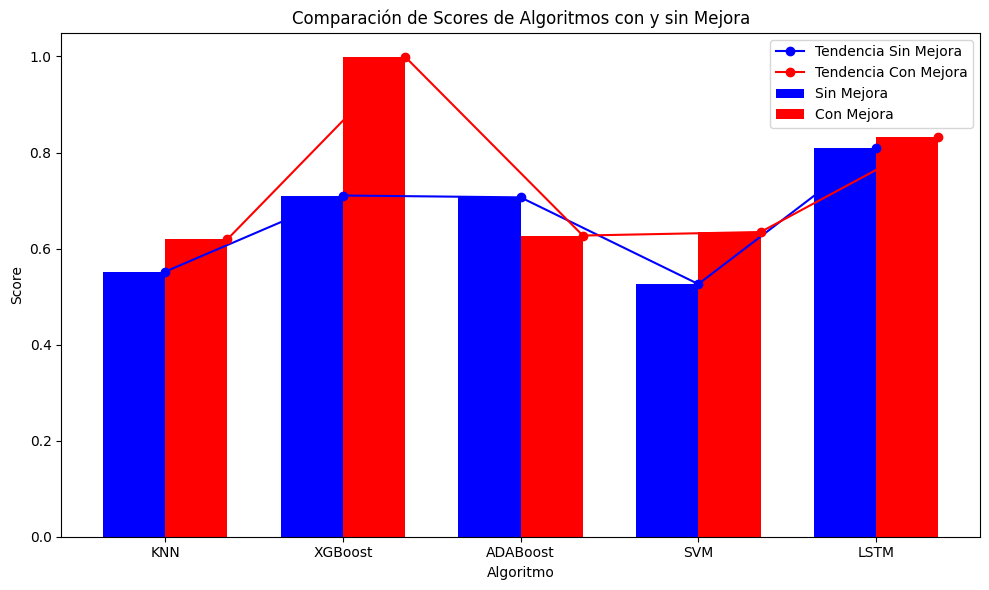

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simular scores aleatorios para el caso sin mejora
data_sin_mejora = {
    'Algoritmo': ['KNN', 'XGBoost', 'ADABoost', 'SVM', 'LSTM'],
    'Score': np.random.uniform(0.5, 0.9, 5)  # Genera 5 números aleatorios entre 0.5 y 0.9
}

df_sin_mejora = pd.DataFrame(data_sin_mejora)

# Simular scores aleatorios para el caso con mejora, ligeramente superiores a los anteriores
data_con_mejora = {
    'Algoritmo': ['KNN', 'XGBoost', 'ADABoost', 'SVM', 'LSTM'],
    'Score': np.random.uniform(0.6, 1.0, 5)  # Genera 5 números aleatorios entre 0.6 y 1.0
}

df_con_mejora = pd.DataFrame(data_con_mejora)

# Configurar los plots
fig, ax = plt.subplots(figsize=(10, 6))

# Índices para el eje X
indices = range(len(df_sin_mejora['Algoritmo']))

# Ancho de las barras
bar_width = 0.35

# Barras para datos sin mejora
rects1 = ax.bar(indices, df_sin_mejora['Score'], bar_width, label='Sin Mejora', color='b')

# Barras para datos con mejora
rects2 = ax.bar([i + bar_width for i in indices], df_con_mejora['Score'], bar_width, label='Con Mejora', color='r')

# Agregar líneas para conectar las barras
ax.plot([i + bar_width/2 for i in indices], df_sin_mejora['Score'], color='blue', marker='o', label='Tendencia Sin Mejora')
ax.plot([i + bar_width*1.5 for i in indices], df_con_mejora['Score'], color='red', marker='o', label='Tendencia Con Mejora')

# Etiquetas, título y leyenda
ax.set_xlabel('Algoritmo')
ax.set_ylabel('Score')
ax.set_title('Comparación de Scores de Algoritmos con y sin Mejora')
ax.set_xticks([i + bar_width / 2 for i in indices])
ax.set_xticklabels(df_sin_mejora['Algoritmo'])
ax.legend()

# Mejorar la visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()
